In [1]:
import pandas as pd 
from io import StringIO  # Import StringIO from the io module
import matplotlib.pyplot as plt

df = pd.read_csv('results_with_nn.csv')

df['history'] = df['history'].apply(lambda x: pd.read_csv(StringIO(x), sep=r'\s+'))

# Print the DataFrame to see the result
print(df['history'][0])  # Shows the 'history' DataFrame from the first row

       loss  mean_absolute_error  val_loss   val_mae
0  1.305795             0.708035  0.089483  0.246031
1  0.602929             0.487471  0.058621  0.199344
2  0.600549             0.528965  0.051282  0.187250
3  0.516875             0.447889  0.060206  0.198210
4  0.929786             0.573544  0.049445  0.174218
5  0.928940             0.574895  0.064637  0.213589
6  0.977073             0.519087  0.058561  0.198716
7  0.879685             0.550980  0.044891  0.167326
8  0.640569             0.464319  0.075998  0.219874
9  3.477005             0.706718  0.081445  0.233804


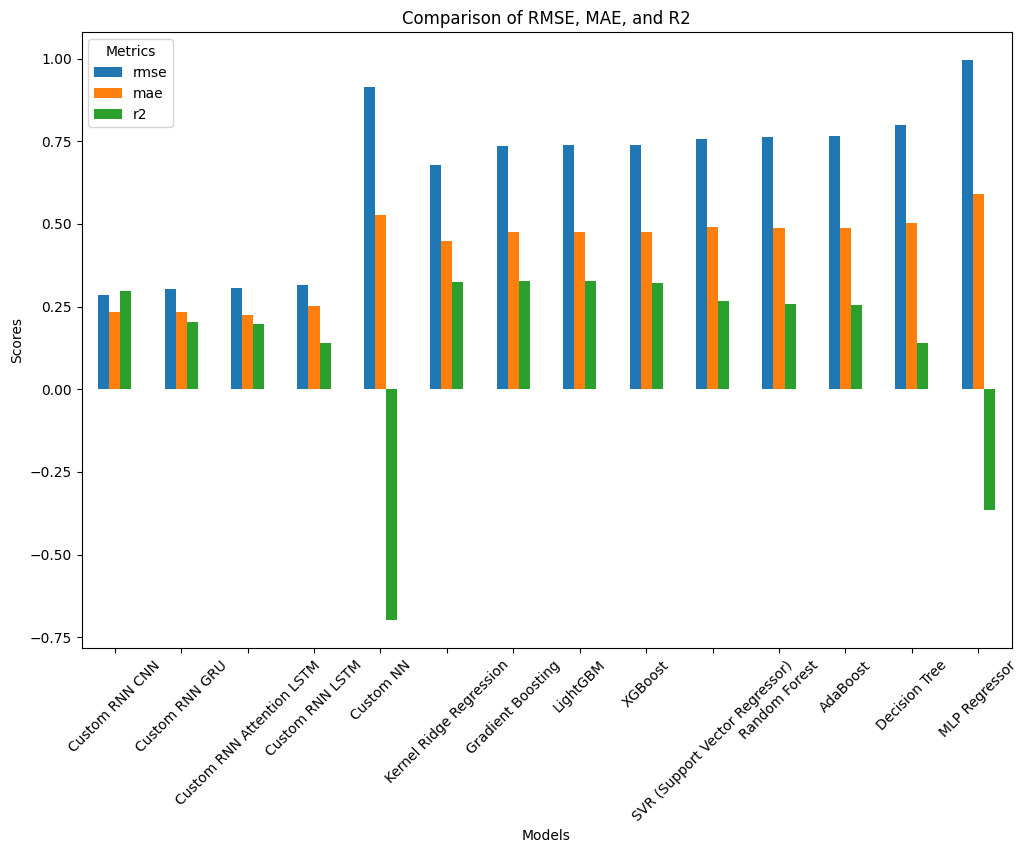

In [2]:
df2 = pd.read_csv('results_regression_models.csv')


df2 = df2[df2['model_name'] != 'Gaussian Process Regressor']

combined_df = pd.concat([df, df2])

combined_df.set_index('model_name')[['rmse', 'mae', 'r2']].plot(kind='bar', figsize=(12, 8))
plt.title('Comparison of RMSE, MAE, and R2')
plt.ylabel('Scores')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.show()

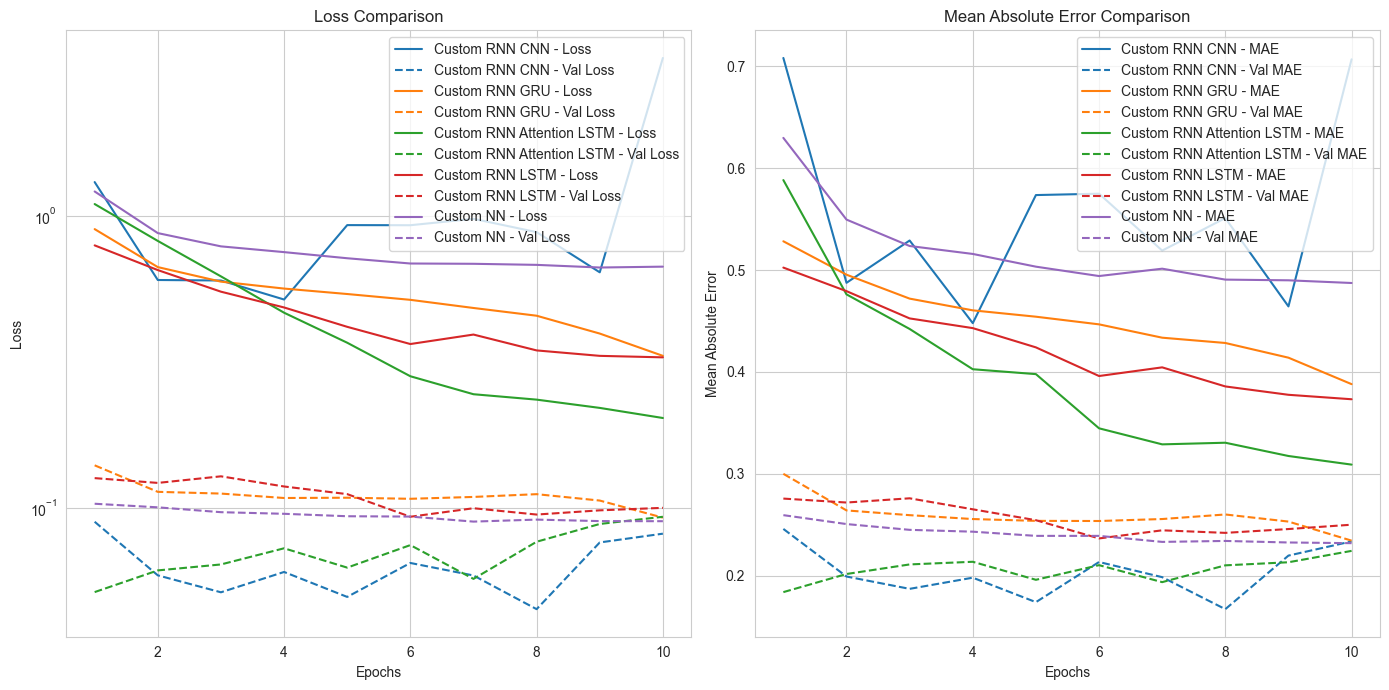

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_training_history(results_df):
    """
    Visualize training history for multiple models from a DataFrame.

    Parameters:
        results_df (pd.DataFrame): DataFrame containing model performance metrics and history.
    """
    
    # Set up color palette
    sns.set_palette("tab10")  # Use a predefined color palette for consistency

    # Initialize figures for Loss and Mean Absolute Error (MAE)
    plt.figure(figsize=(14, 7))
    sns.set_style("whitegrid")

    # Plot Loss Comparison
    plt.subplot(1, 2, 1)
    for i, row in results_df.iterrows():
        model_name = row['model_name']
        history = row['history']
        if 'loss' in history and 'val_loss' in history:
            epochs = range(1, len(history['loss']) + 1)
            plt.plot(epochs, history['loss'], label=f"{model_name} - Loss", linestyle='-', color=sns.color_palette()[i % len(sns.color_palette())])
            plt.plot(epochs, history['val_loss'], label=f"{model_name} - Val Loss", linestyle='--', color=sns.color_palette()[i % len(sns.color_palette())])

    plt.title("Loss Comparison")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.yscale("log")  # Optional: Use a logarithmic scale for better visualization

    # Plot Mean Absolute Error (MAE) Comparison
    plt.subplot(1, 2, 2)
    for i, row in results_df.iterrows():
        model_name = row['model_name']
        history = row['history']
        if 'mean_absolute_error' in history and 'val_mae' in history:
            epochs = range(1, len(history['mean_absolute_error']) + 1)
            plt.plot(epochs, history['mean_absolute_error'], label=f"{model_name} - MAE", linestyle='-', color=sns.color_palette()[i % len(sns.color_palette())])
            plt.plot(epochs, history['val_mae'], label=f"{model_name} - Val MAE", linestyle='--', color=sns.color_palette()[i % len(sns.color_palette())])

    plt.title("Mean Absolute Error Comparison")
    plt.xlabel("Epochs")
    plt.ylabel("Mean Absolute Error")
    plt.legend()

    # Show plots
    plt.tight_layout()
    plt.show()

# Call the function with your DataFrame
visualize_training_history(df)


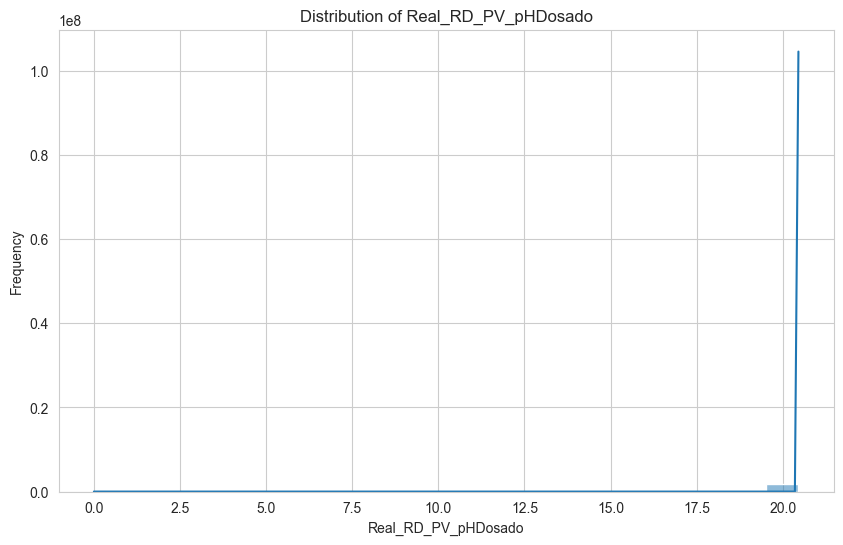

In [7]:
#Load the data
df3 = pd.read_csv('Dados Brutos pHDosado - Completo.csv')

#Plotting the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df3['Real_RD_PV_BaumeCal'], kde=True)
plt.title('Distribution of Real_RD_PV_pHDosado')
plt.xlabel('Real_RD_PV_pHDosado')
plt.ylabel('Frequency')
plt.show()

In [5]:
df3

,ID,timezone,Real_RD_PV_pHDosado,Real_RD_MV_ValvulaCalpHDosado,Real_RD_PV_VazaoDosado,Real_RD_ST_LimpezaPHmetro,Real_RD_PV_BaumeCal,Real_RD_PV_PressaoLinhaCal,Real_RD_MV_ValvulaCalpHDosado-2,Real_RD_MV_PressaoLinhaCal,Real_RD_PV_NivelTqCal,Real_RD_PV_NivelTqDosado
0,393652,2024-07-13 14:28:22,7.1260,37.128124,899.625,0.0,20.454374,0.798437,37.128124,74.546875,98.312500,73.843750
1,393653,2024-07-13 14:28:25,7.1225,37.178123,899.625,0.0,20.454374,0.798437,37.178123,74.578125,98.343750,73.875000
2,393654,2024-07-13 14:28:28,7.1225,37.187500,899.625,0.0,20.454374,0.796875,37.187500,74.559375,98.406250,73.875000
3,393655,2024-07-13 14:28:31,7.1260,37.331249,899.625,0.0,20.454374,0.798437,37.331249,74.596875,98.500000,73.843750
4,393656,2024-07-13 14:28:34,7.1225,37.218750,900.375,0.0,20.454374,0.798437,37.218750,74.562500,98.250000,73.875000
...,...,...,...,...,...,...,...,...,...,...,...,...
1811892,389691,2024-09-11 11:59:46,7.6230,25.206249,837.750,0.0,20.454374,0.800000,25.206249,69.303125,100.696875,19.168751
1811893,389692,2024-09-11 11:59:49,7.6230,25.228125,837.000,0.0,20.454374,0.800000,25.228125,69.331250,100.896875,19.262501
1811894,389693,2024-09-11 11:59:52,7.6230,25.196875,837.375,0.0,20.454374,0.801562,25.196875,69.315625,101.046875,19.168751
1811895,389694,2024-09-11 11:59:55,7.6125,25.275000,834.750,0.0,20.454374,0.804688,25.275000,69.240625,100.721875,19.043751
